In [27]:
import time, datetime
import sys
import subprocess as sp
import os
from pathlib import Path
from sys import exit
#FIXME For copying file it is better to use implemented python function
import shutil
# Conversion of Hartree to kcal per mol
au2kcal = 627.509474
# Conversion eV to Joule
ev2jl = 1.6021766339999E-19
# Conversion of Hartree to electronvolt
from pyscf.data.nist import HARTREE2EV as au2ev
import matplotlib.pyplot as plt

In [28]:
import pandas.util  # Assuming 'util' is an alias for pandas.util
import pandas as pd
# Read the CSV file

In [29]:
df = pd.read_csv("best_GDB9.csv")
df_smiles=df.iloc[0:10,:]

df_smiles

,smiles_key,SMILES,HOMO,LUMO,Gap,HOMO(eV),LUMO(eV),Gap(eV)
0,gdb 6,C=O,-0.2670,-0.0406,0.2263,-7.265440,-1.104782,6.157937
1,gdb 11,CC=O,-0.2540,-0.0198,0.2342,-6.911692,-0.538785,6.372907
2,gdb 18,CC(C)=O,-0.2431,-0.0087,0.2344,-6.615088,-0.236739,6.378349
3,gdb 23,C#CC#C,-0.2599,-0.0214,0.2386,-7.072239,-0.582324,6.492637
4,gdb 24,C#CC#N,-0.3102,-0.0543,0.2559,-8.440972,-1.477578,6.963394
5,gdb 25,N#CC#N,-0.3696,-0.0926,0.2770,-10.057328,-2.519774,7.537554
6,gdb 26,O=CC#C,-0.2777,-0.0735,0.2042,-7.556602,-2.000037,5.556565
7,gdb 27,O=CC#N,-0.3166,-0.1100,0.2066,-8.615125,-2.993252,5.621872
8,gdb 28,O=CC=O,-0.2668,-0.1113,0.1555,-7.259998,-3.028627,4.231371
9,gdb 35,CCC=O,-0.2500,-0.0205,0.2295,-6.802847,-0.557833,6.245013


3

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import json
import sys
from tqdm import tqdm
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn import linear_model
from cycler import cycler
import string
from itertools import cycle
import pandas as pd

In [5]:


def label_axes(fig, labels=None, loc=None, **kwargs):
    if labels is None:
        labels = string.ascii_lowercase
    labels = cycle(labels)
    if loc is None:
        loc = (-0.1, 1.1)
    axes = [ax for ax in fig.axes if ax.get_label() != '<colorbar>']
    for ax, lab in zip(axes, labels):
        ax.annotate('(' + lab + ')', size=14, xy=loc,
                    xycoords='axes fraction',
                    **kwargs)


In [9]:

dataQMsym =df['HOMO(eV)']
dataSCOP=df['LUMO(eV)']
dataALT1=df['Gap(eV)']
dataALS1= df['HOMO']
dataQMsymex=df['Gap']


In [30]:
dataAll = pd.read_csv("rdkit_dataset_Gdb9_6-7-1.csv")
dataAll

,smiles_key,SMILES,HOMO(eV),HOMO_xtb(eV),HOMO_HF(eV),HOMO_DFT(eV),LUMO(eV),LUMO_xtb(eV),LUMO_HF(eV),LUMO_DFT(eV),...,rmsd_conf(A),rmsd1_conf(A),rmsd_opt(A),rmsd1_opt(A),rdkit_time,xtb_time,crest_time,xtb_opt_time,dft_time,xtb_cal_time
0,gdb 6,C=O,-7.265440,-8.2725,-11.998064,-7.250440,-1.104782,3.7638,2.341292,-2.398907,...,0.140728,0.140997,0.133209,0.000425,0.044391,0.066756,2.931592,0.051072,5.519239,0.001183
1,gdb 11,CC=O,-6.911692,-7.8151,-11.446164,-6.880599,-0.538785,2.9005,2.676991,-1.962855,...,0.714581,0.714196,0.829722,0.001953,0.003492,0.271686,4.909994,0.065792,14.023237,0.000708
2,gdb 18,CC(C)=O,-6.615088,-7.4555,-11.083129,-6.637265,-0.236739,2.5009,2.879657,-1.667241,...,1.078982,1.079223,0.924983,0.002588,0.010362,0.344117,8.872018,0.240095,22.340856,0.000934


In [14]:
r2_homo_xtb = r2_score(dataAll['HOMO(eV)'], dataAll['HOMO_xtb(eV)'])
r2_homo_dft = r2_score(dataAll['HOMO(eV)'], dataAll['HOMO_DFT(eV)'])
MAE_homo_xtb = mean_absolute_error(dataAll['LUMO(eV)'], dataAll['LUMO_xtb(eV)'])
MAE_homo_dft = mean_absolute_error(dataAll['LUMO(eV)'], dataAll['LUMO_DFT(eV)'])
r2_lumo_xtb = r2_score(dataAll['LUMO(eV)'], dataAll['LUMO_xtb(eV)'])
r2_lumo_dft = r2_score(dataAll['LUMO(eV)'], dataAll['LUMO_DFT(eV)'])
MAE_lumo_xtb = mean_absolute_error(dataAll['LUMO(eV)'], dataAll['LUMO_xtb(eV)'])
MAE_lumo_dft = mean_absolute_error(dataAll['LUMO(eV)'], dataAll['LUMO_DFT(eV)'])
r2_gap_xtb = r2_score(dataAll['GAP(eV)'], dataAll['GAP_xtb(eV)'])
r2_gap_dft = r2_score(dataAll['GAP(eV)'], dataAll['GAP_DFT(eV)'])
MAE_gap_xtb = mean_absolute_error(dataAll['GAP(eV)'], dataAll['GAP_xtb(eV)'])
MAE_gap_dft = mean_absolute_error(dataAll['GAP(eV)'], dataAll['GAP_DFT(eV)'])

print('ENERGY homo')
print(r2_homo_xtb, r2_homo_dft)
print(MAE_homo_xtb, MAE_homo_dft)
print('ENERGY lumo')
print(r2_lumo_xtb,r2_lumo_dft)
print(MAE_lumo_xtb, MAE_lumo_dft)
print('ENERGY gap')
print(r2_gap_xtb, r2_gap_dft)
print(MAE_gap_xtb,MAE_gap_dft)

ENERGY homo
-10.963824158737829 0.9920592765563014
3.6818355913273333 1.3828985442626935
ENERGY lumo
-109.78977722400795 -13.803404365651112
3.6818355913273333 1.3828985442626935
ENERGY gap
-2093.9776614836383 -182.73870071035597
4.599729385151 1.389963596021948


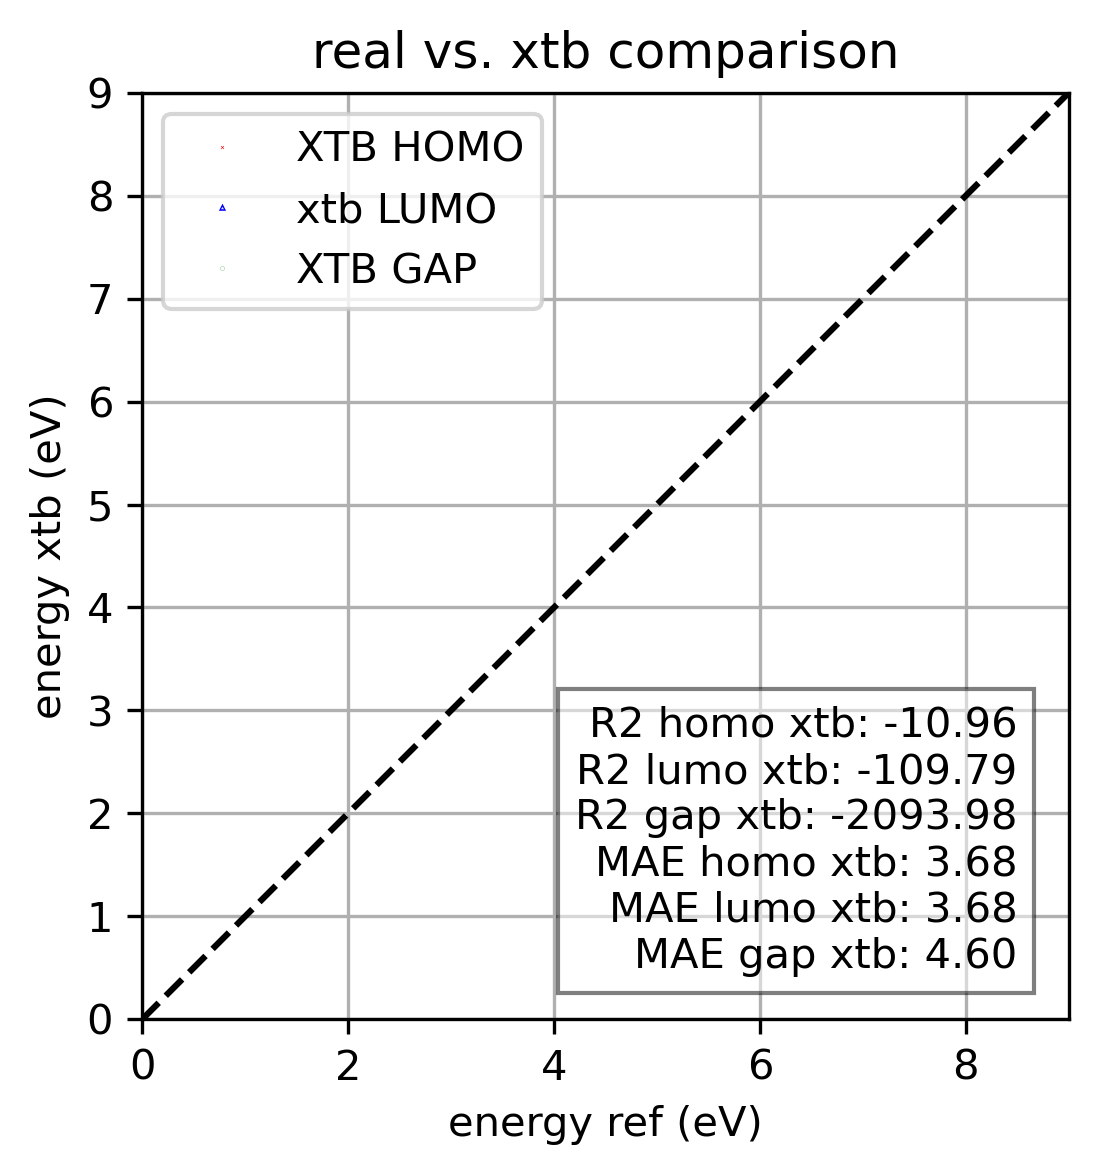

In [20]:
fig = plt.figure(num=1, figsize=[7, 4], dpi=300, clear=True)
ax = fig.add_subplot(1, 2, 1)
ax.set_axisbelow(True)

plt.plot(dataAll['HOMO(eV)'], dataAll['HOMO_xtb(eV)'], 'x', color='red', markersize=0.1, label='XTB HOMO')
plt.plot(dataAll['HOMO(eV)'], dataAll['HOMO_DFT(eV)'], '^', color='blue', markersize=0.1, label='xtb LUMO')
plt.plot(dataAll['HOMO(eV)'], dataAll['HOMO_DFT(eV)'], '.', color='green', markersize=0.1, label='XTB GAP')

x = np.linspace(0, 9, 100)
plt.plot(x, x, 'k--')
plt.grid(True)
plt.legend(loc='upper left')
plt.xlabel('energy ref (eV)')
plt.ylabel('energy xtb (eV)')
plt.title('real vs. xtb comparison')
plt.xlim(0, 9)
plt.ylim(0, 9)
plt.annotate('R2 homo xtb: %0.2f\n' % r2_homo_xtb +
                 'R2 lumo xtb: %0.2f\n' % r2_lumo_xtb +
                 'R2 gap xtb: %0.2f\n' % r2_gap_xtb +
                 'MAE homo xtb: %0.2f\n' % MAE_homo_xtb +
                 'MAE lumo xtb: %0.2f\n' % MAE_lumo_xtb +
                 'MAE gap xtb: %0.2f' % MAE_gap_xtb,
                 (8.5, 0.5),
                 bbox=dict(facecolor='white', alpha=0.5),
                 ha='right')
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()

/tmp/ipykernel_1370478/2693584063.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left')
/tmp/ipykernel_1370478/2693584063.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left')


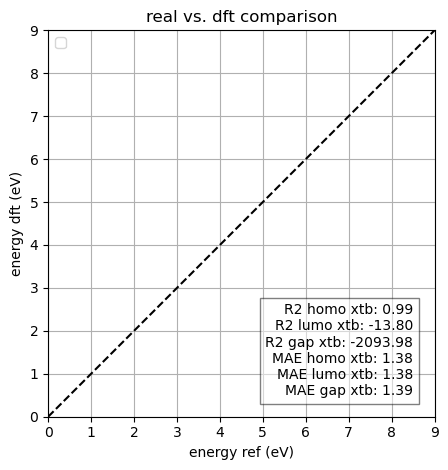

In [21]:




    # get metrics
  

   

ax = fig.add_subplot(1, 2, 2)
ax.set_axisbelow(True)

plt.plot(x, x, 'k--')
plt.grid(True)
plt.legend(loc='upper left')
plt.legend(loc='upper left')
plt.xlabel('energy ref (eV)')
plt.ylabel('energy dft (eV)')
plt.title('real vs. dft comparison')
plt.xlim(0, 9)
plt.ylim(0, 9)
plt.annotate('R2 homo xtb: %0.2f\n' % r2_homo_dft +
                 'R2 lumo xtb: %0.2f\n' % r2_lumo_dft +
                 'R2 gap xtb: %0.2f\n' % r2_gap_xtb +
                 'MAE homo xtb: %0.2f\n' % MAE_homo_dft +
                 'MAE lumo xtb: %0.2f\n' % MAE_lumo_dft +
                 'MAE gap xtb: %0.2f' % MAE_gap_dft,
                 (8.5, 0.5),
                 bbox=dict(facecolor='white', alpha=0.5),
                 ha='right')
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.savefig('mopssam_calib_nrg_' + '.png')





In [24]:
regr = linear_model.LinearRegression()
regr.fit(np.array(dataAll['HOMO_xtb(eV)']).reshape(-1, 1), np.array(dataAll['HOMO(eV)']).reshape(-1, 1))
dataAll['xTB_Lin'] = [x[0] for x in regr.predict(np.array(dataAll['HOMO_xtb(eV)']).reshape(-1, 1))]
regr = linear_model.LinearRegression()
regr.fit(np.array(dataAll['HOMO_DFT(eV)']).reshape(-1, 1), np.array(dataAll['HOMO(eV)']).reshape(-1, 1))
dataAll['DFT_Lin'] = [x[0] for x in regr.predict(np.array(dataAll['HOMO_DFT(eV)']).reshape(-1, 1))]
# dataAll.info()
dataAll.to_csv('all_data_' + '.csv', index=False)


In [25]:
dataAll

,smiles_key,SMILES,HOMO(eV),HOMO_xtb(eV),HOMO_HF(eV),HOMO_DFT(eV),LUMO(eV),LUMO_xtb(eV),LUMO_HF(eV),LUMO_DFT(eV),...,rmsd_opt(A),rmsd1_opt(A),rdkit_time,xtb_time,crest_time,xtb_opt_time,dft_time,xtb_cal_time,xTB_Lin,DFT_Lin
0,gdb 6,C=O,-7.265440,-8.2725,-11.998064,-7.250440,-1.104782,3.7638,2.341292,-2.398907,...,0.133209,0.000425,0.044391,0.066756,2.931592,0.051072,5.519239,0.001183,-7.268464,-7.275488
1,gdb 11,CC=O,-6.911692,-7.8151,-11.446164,-6.880599,-0.538785,2.9005,2.676991,-1.962855,...,0.829722,0.001953,0.003492,0.271686,4.909994,0.065792,14.023237,0.000708,-6.904822,-6.886373
2,gdb 18,CC(C)=O,-6.615088,-7.4555,-11.083129,-6.637265,-0.236739,2.5009,2.879657,-1.667241,...,0.924983,0.002588,0.010362,0.344117,8.872018,0.240095,22.340856,0.000934,-6.618934,-6.630359


In [34]:
df=dataAll
df

,smiles_key,SMILES,HOMO(eV),HOMO_xtb(eV),HOMO_HF(eV),HOMO_DFT(eV),LUMO(eV),LUMO_xtb(eV),LUMO_HF(eV),LUMO_DFT(eV),...,rmsd_conf(A),rmsd1_conf(A),rmsd_opt(A),rmsd1_opt(A),rdkit_time,xtb_time,crest_time,xtb_opt_time,dft_time,xtb_cal_time
0,gdb 6,C=O,-7.265440,-8.2725,-11.998064,-7.250440,-1.104782,3.7638,2.341292,-2.398907,...,0.140728,0.140997,0.133209,0.000425,0.044391,0.066756,2.931592,0.051072,5.519239,0.001183
1,gdb 11,CC=O,-6.911692,-7.8151,-11.446164,-6.880599,-0.538785,2.9005,2.676991,-1.962855,...,0.714581,0.714196,0.829722,0.001953,0.003492,0.271686,4.909994,0.065792,14.023237,0.000708
2,gdb 18,CC(C)=O,-6.615088,-7.4555,-11.083129,-6.637265,-0.236739,2.5009,2.879657,-1.667241,...,1.078982,1.079223,0.924983,0.002588,0.010362,0.344117,8.872018,0.240095,22.340856,0.000934


HOMO Metrics:
R2 xtb: -12.57, MAE xtb: 0.92
R2 lin: 1.00, MAE lin: 0.01
R2 ML: -2435.01, MAE ML: 12.43


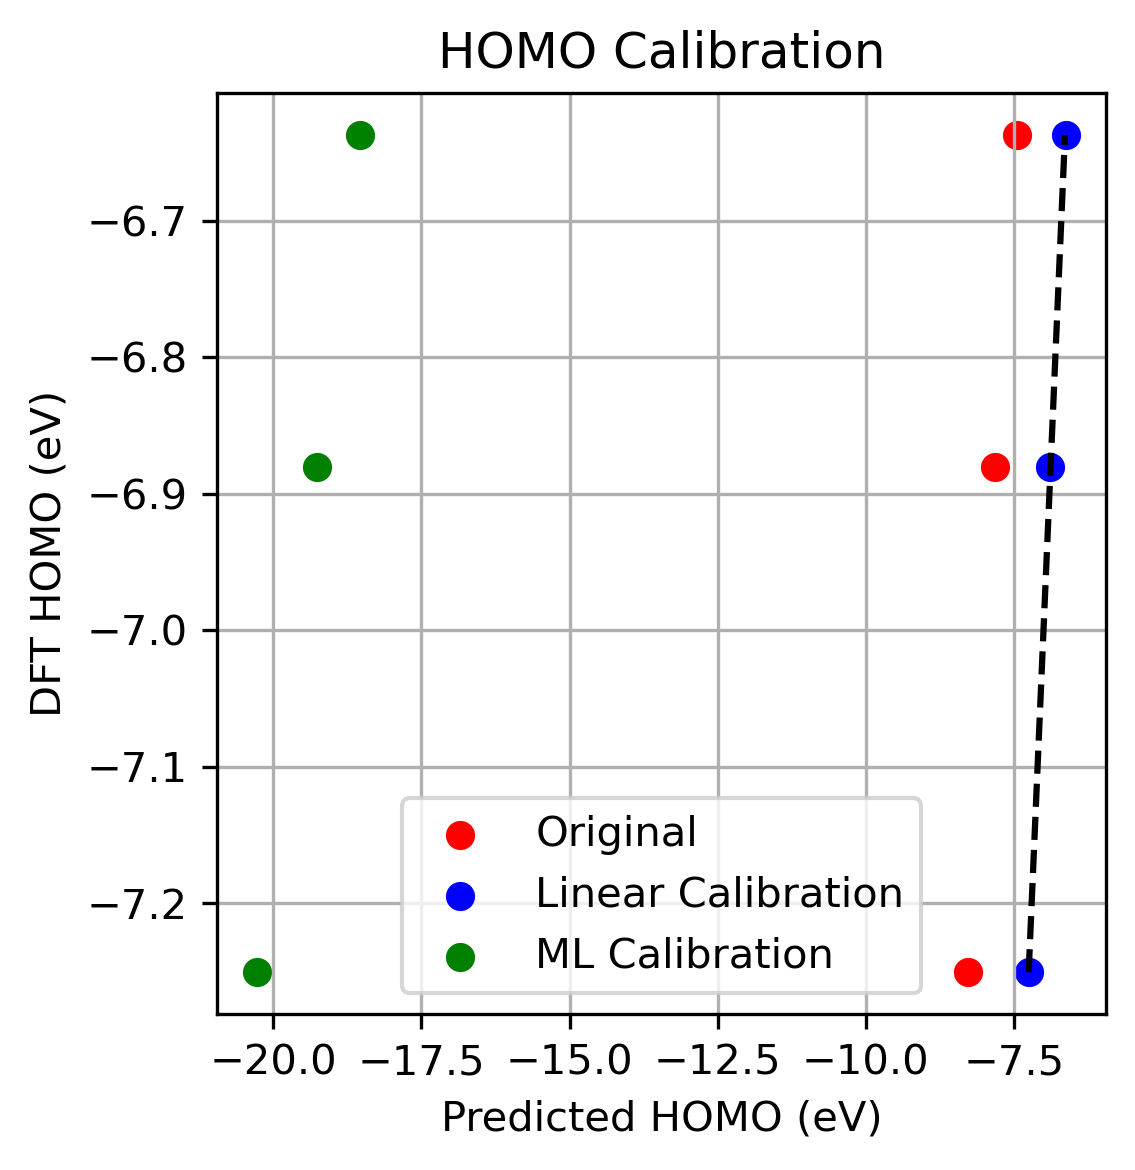

In [35]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt

def analyze_ML(df):

    
    # Calibration ML: correction des prédictions HOMO et LUMO
    df['HOMO_ML_calib'] = df['HOMO_xtb(eV)'] + df['HOMO_HF(eV)']  # Exemple avec correction
    df['LUMO_ML_calib'] = df['LUMO_xtb(eV)'] + df['LUMO_HF(eV)']

    # Calibration linéaire
    lin_reg_homo = LinearRegression()
    lin_reg_homo.fit(df[['HOMO_xtb(eV)']], df['HOMO_DFT(eV)'])
    df['HOMO_Lin_calib'] = lin_reg_homo.predict(df[['HOMO_xtb(eV)']])

    lin_reg_lumo = LinearRegression()
    lin_reg_lumo.fit(df[['LUMO_xtb(eV)']], df['LUMO_DFT(eV)'])
    df['LUMO_Lin_calib'] = lin_reg_lumo.predict(df[['LUMO_xtb(eV)']])

    # Calcul des métriques pour les calibrations ML et linéaire
    r2_HOMO_xtb = r2_score(df['HOMO_DFT(eV)'], df['HOMO_xtb(eV)'])
    mae_HOMO_xtb = mean_absolute_error(df['HOMO_DFT(eV)'], df['HOMO_xtb(eV)'])

    r2_HOMO_lin = r2_score(df['HOMO_DFT(eV)'], df['HOMO_Lin_calib'])
    mae_HOMO_lin = mean_absolute_error(df['HOMO_DFT(eV)'], df['HOMO_Lin_calib'])

    r2_HOMO_ML = r2_score(df['HOMO_DFT(eV)'], df['HOMO_ML_calib'])
    mae_HOMO_ML = mean_absolute_error(df['HOMO_DFT(eV)'], df['HOMO_ML_calib'])

    print('HOMO Metrics:')
    print(f'R2 xtb: {r2_HOMO_xtb:.2f}, MAE xtb: {mae_HOMO_xtb:.2f}')
    print(f'R2 lin: {r2_HOMO_lin:.2f}, MAE lin: {mae_HOMO_lin:.2f}')
    print(f'R2 ML: {r2_HOMO_ML:.2f}, MAE ML: {mae_HOMO_ML:.2f}')

    # Représentation graphique des résultats
    plt.figure(figsize=[7, 4], dpi=300)

    # Graphique pour HOMO
    plt.subplot(1, 2, 1)
    plt.scatter(df['HOMO_xtb(eV)'], df['HOMO_DFT(eV)'], color='red', label='Original')
    plt.scatter(df['HOMO_Lin_calib'], df['HOMO_DFT(eV)'], color='blue', label='Linear Calibration')
    plt.scatter(df['HOMO_ML_calib'], df['HOMO_DFT(eV)'], color='green', label='ML Calibration')
    plt.plot([min(df['HOMO_DFT(eV)']), max(df['HOMO_DFT(eV)'])], [min(df['HOMO_DFT(eV)']), max(df['HOMO_DFT(eV)'])], 'k--')
    plt.xlabel('Predicted HOMO (eV)')
    plt.ylabel('DFT HOMO (eV)')
    plt.title('HOMO Calibration')
    plt.legend()
    plt.grid(True)

    # LUMO metrics and plot can be added similarly

    plt.tight_layout()
    plt.show()

    # Optionally save the updated DataFrame
    df.to_csv('calibrated_data.csv', index=False)

# Exécution de l'analyse avec le DataFrame en entrée
  # Chargement du DataFrame avec les colonnes correspondantes
analyze_ML(df)
